In [1]:
from mtdnn_utils import *
from data_utils import get_data_loader
from data_utils import get_data_loader_full
from mol_spec import MoleculeSpec
from deep_scaffold import DeepScaffold
from eval_sys import *

import warnings

warnings.filterwarnings("ignore")

## load in the two models

In [4]:
mdl = build_model('./ckpt/ckpt-default')
mtdnn_path = './mtdnn/models_15_decay'
mtdnn = mtdnn_us(mtdnn_path)


## input the scaffold , genrate and predict the bioactivity

In [6]:
scaffold = 'S=C(N/1)NC(C1=C/C(O2)=CC=C2C3=CC=CC=C3)=O'

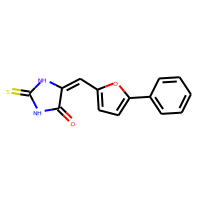

In [7]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold)], molsPerRow=1)

In [8]:
sample_generate = sample(mdl, scaffold, 200)
sample_generate_ = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in sample_generate[0] if i is not None]
sample_generate_x = list(set(sample_generate_))
activity = [mtdnn.predict(i) for i in sample_generate_x if i is not None]

## visualization

In [15]:
ksxy = pd.read_csv('site_xy.csv', index_col=0)
kinase_tab = pd.read_csv('site_info_drawversion.csv', index_col=0)
act_kinase_list = [list(kinase_tab.iloc[i, 0]) for i in activity]
act_kinase_class = [list(kinase_tab.iloc[i, 1]) for i in activity]
classlist = list(kinase_tab.iloc[:, 1])

### output the structure with the most active sites

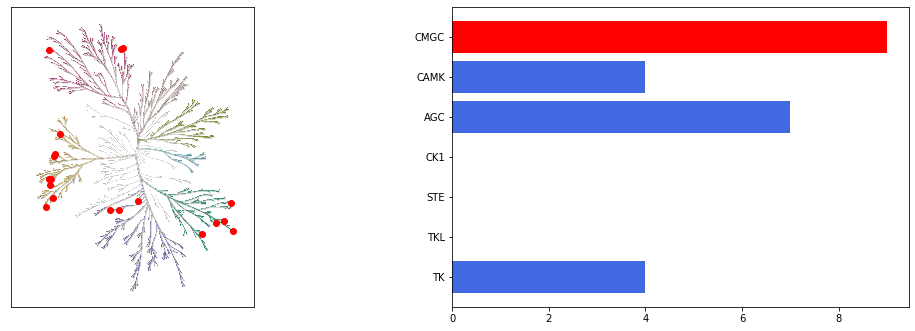

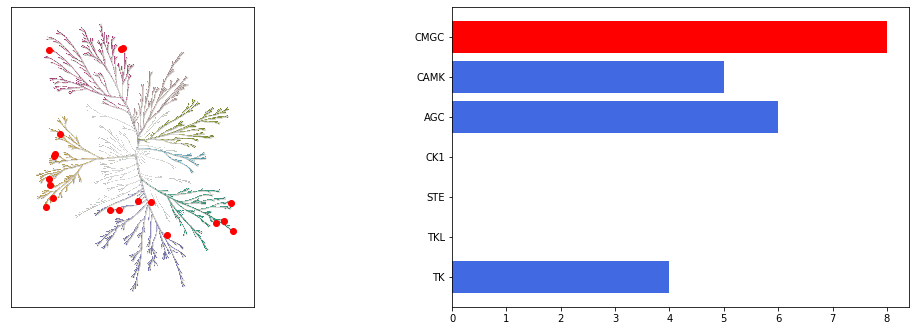

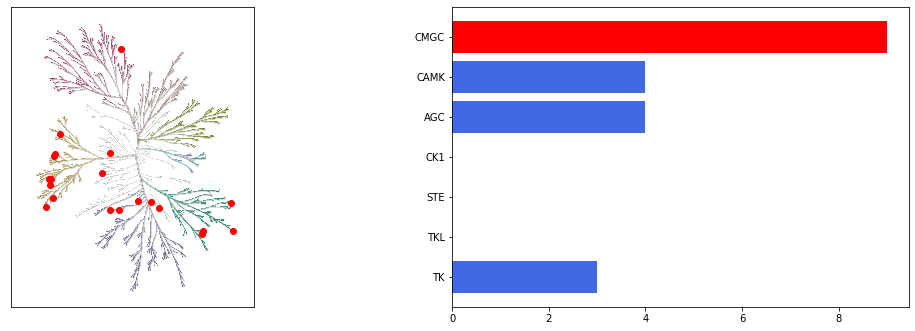

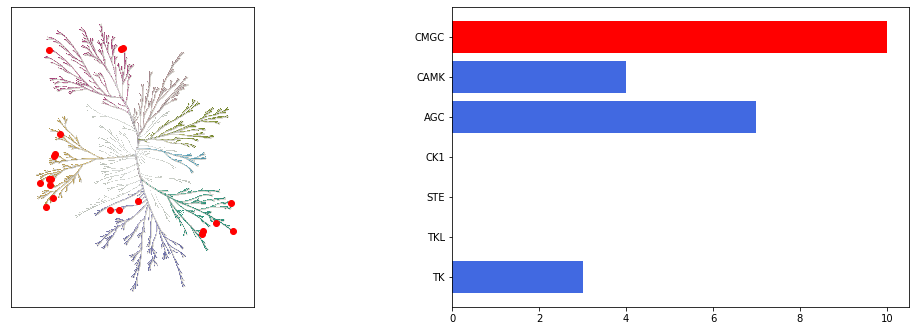

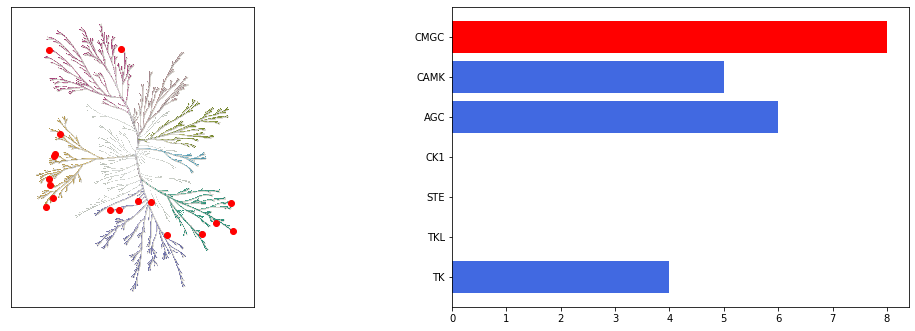

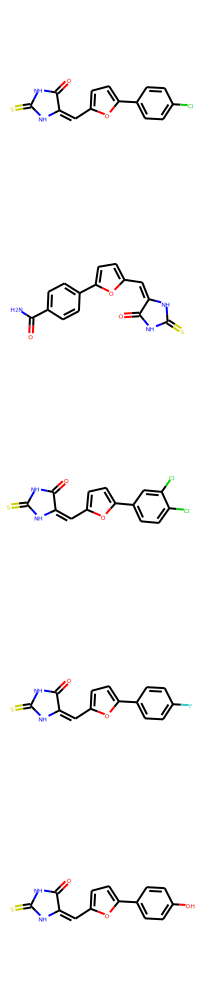

In [7]:
count_site = [len(i) for i in act_kinase_list]
max_num = heapq.nlargest(5, count_site)
max_ind = []
for i in max_num:
    index = count_site.index(i)
    max_ind.append(index)
    count_site[index] = 0

act_x = []
act_y = []
for i1, i in enumerate([act_kinase_list[x] for x in max_ind]):
    act_x += [list(ksxy.loc[i].iloc[:, 1])]
    act_y += [list(ksxy.loc[i].iloc[:, 2])]

im = array(Image.open('tree.png'))

from collections import Counter
class_disc = np.zeros([len(act_kinase_class), 7])
for i1, i in enumerate(act_kinase_class):
    for j1, j in enumerate(['TK', 'TKL', 'STE', 'CK1', 'AGC', 'CAMK', 'CMGC']):
        class_disc[i1][j1] = i.count(j)



for i in range(5):
    plt.figure(figsize=(18, 32))
    subplot(5, 2 , 2*i+1)
    plot(act_x[i] ,act_y[i] ,'ro')

    imshow(im)
    plt.xticks([])
    plt.yticks([])
    

    ax = subplot(5, 2, 2*i+2)
    red_col = list(class_disc[max_ind[i]]).index(max(class_disc[max_ind[i]]))
    color_dic = ['royalblue' for k in range(7)]
    color_dic[red_col] = 'red'
    ax.barh(['TK', 'TKL', 'STE', 'CK1', 'AGC', 'CAMK', 'CMGC'], class_disc[max_ind[i]], color=color_dic)

    
    plt.show()


Draw.MolsToGridImage([Chem.MolFromSmiles(sample_generate_x[i]) for i in max_ind], molsPerRow=5)

### output the most family-selective structure

#### choose one kinase family

In [11]:
kinase = 'CMGC'
kinase_num = ['TK', 'TKL', 'STE', 'CK1', 'AGC', 'CAMK', 'CMGC'].index(kinase)
class_disc_or = np.zeros((len(sample_generate_x), 7))
for i in range(len(sample_generate_x)):
    class_disc_or[i, :] = mtdnn.select_or(sample_generate_x[i], classlist)

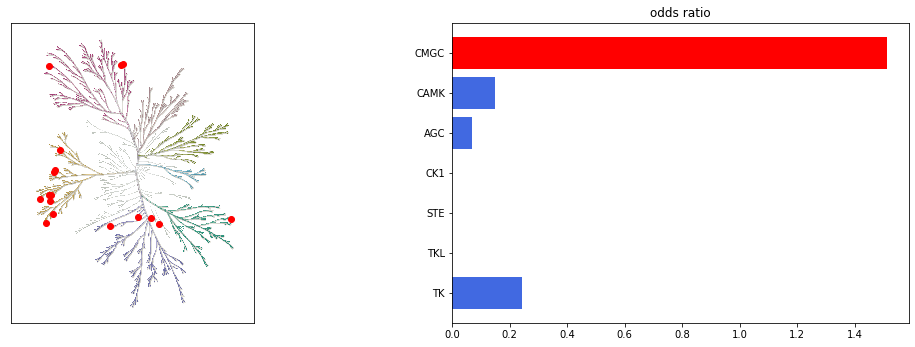

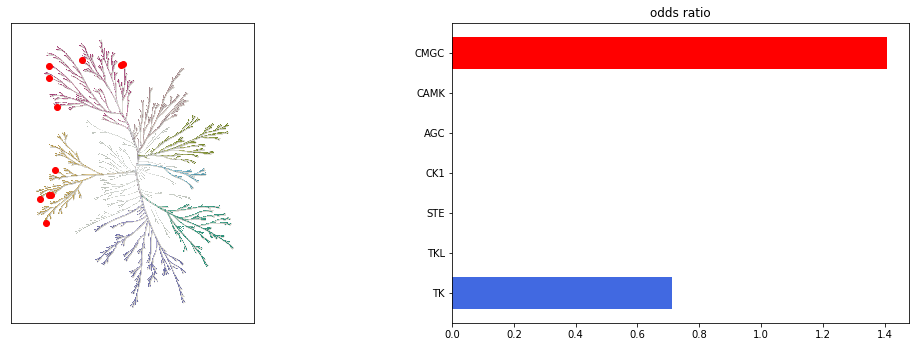

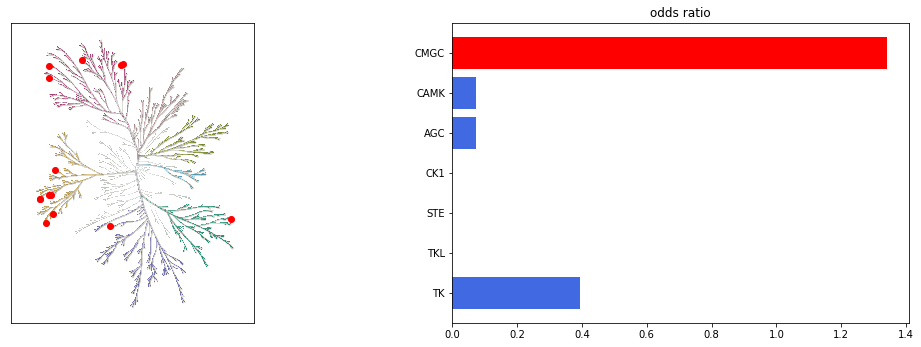

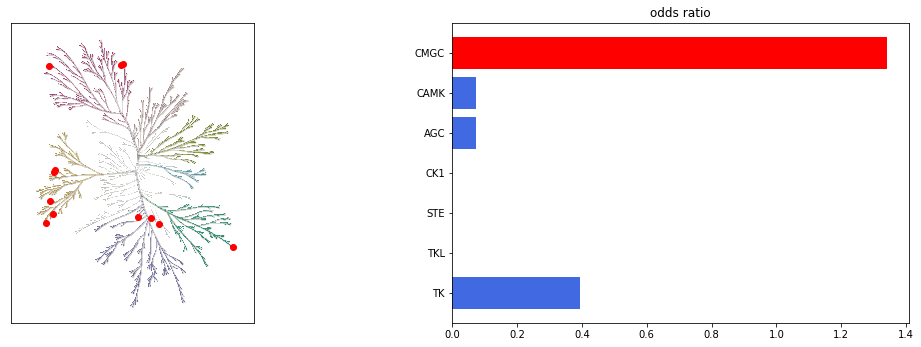

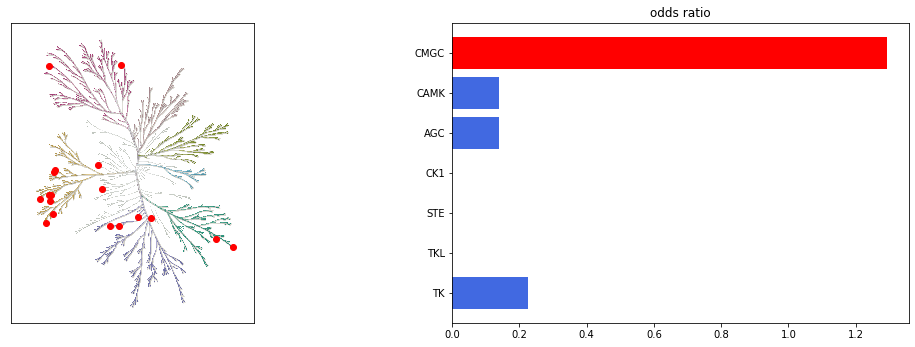

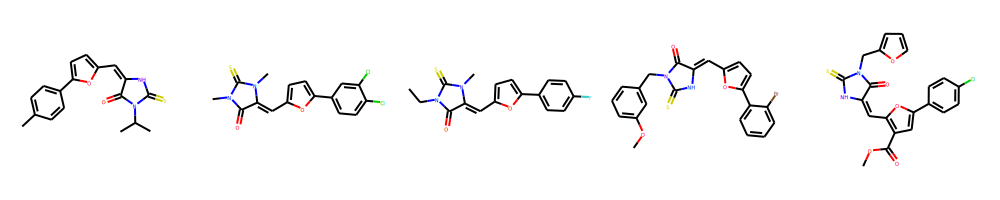

In [12]:
count_site = list(class_disc_or[:, kinase_num])
max_num = heapq.nlargest(5, count_site)
max_ind = []
for i in max_num:
    index = count_site.index(i)
    max_ind.append(index)
    count_site[index] = 0

    
act_x = []
act_y = []
for i1, i in enumerate([act_kinase_list[x] for x in max_ind]):
    act_x += [list(ksxy.loc[i].iloc[:, 1])]
    act_y += [list(ksxy.loc[i].iloc[:, 2])]

im = array(Image.open('tree.png'))




for i in range(5):
    plt.figure(figsize=(18, 32))
    ax1 = subplot(5, 2 , 2*i+1)
    plot(act_x[i] ,act_y[i] ,'ro')
    imshow(im)
    plt.xticks([])
    plt.yticks([])

    

    ax = subplot(5, 2, 2*i+2)
    red_col = list(class_disc_or[max_ind[i]]).index(max(class_disc_or[max_ind[i]]))
    color_dic = ['royalblue' for k in range(7)]
    color_dic[red_col] = 'red'
    ax.barh(['TK', 'TKL', 'STE', 'CK1', 'AGC', 'CAMK', 'CMGC'], class_disc_or[max_ind[i]], color=color_dic)

    plt.title('odds ratio')
    plt.show()


Draw.MolsToGridImage([Chem.MolFromSmiles(sample_generate_x[i]) for i in max_ind], molsPerRow=5)

In [10]:
len(sample_generate_x)

134

In [18]:
from optimize_givenstep import *
optimizer = Deep_optimizer('O=C(N1)C=C(C2=CC=CC=C2)C1=O', 'select', ['./ckpt/ckpt-default', './mtdnn/models_15_decay' ])

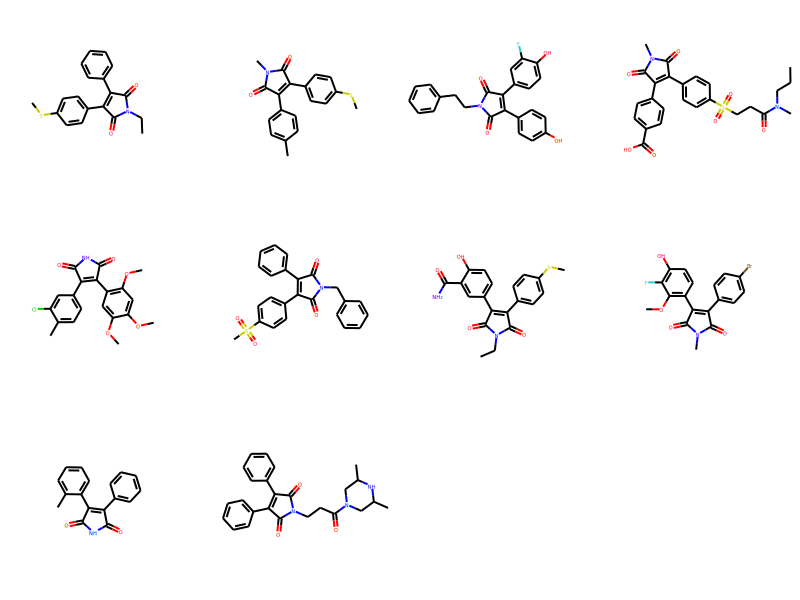

In [19]:
mols_opt = optimizer.optimize(10, ['hGSK3a', 'hGSK3b'])
Draw.MolsToGridImage(mols_opt[1], molsPerRow=4)

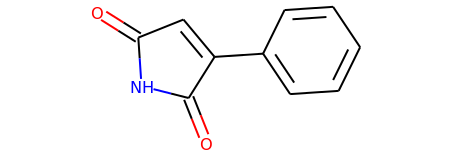

In [15]:
Chem.MolFromSmiles('O=C(N1)C=C(C2=CC=CC=C2)C1=O')